# Mobile Price Classification

## Modelado, entrenamiento y evaluación

### Cargamos las librerías que vamos a utilizar

In [16]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Dividir dataset, modelo y métricas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos el dataset limpio

In [17]:
# Cargar dataset
df = pd.read_csv('mobile_clean.csv')

### Seleccionamos nuetsras variables del modelo

In [18]:
important_features = ['ram', 'battery_power', 'px_height', 'px_width', 'dual_sim', 'touch_screen']

X = df[important_features]  # Features
y = df['price_range']       # Target


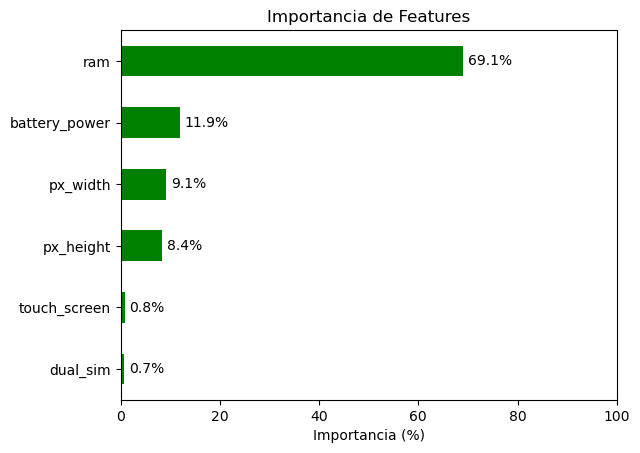

In [19]:
feat_importances = pd.Series(rf_model.feature_importances_, index=important_features)
feat_importances = feat_importances * 100  # Convertir a porcentaje

# Ordenar y graficar
feat_importances_sorted = feat_importances.sort_values()
ax = feat_importances_sorted.plot(kind='barh', color='green')
plt.xlabel("Importancia (%)")
plt.xlim(0, 100)  # Eje x de 0 a 100%
plt.title("Importancia de Features")

# Añadir los porcentajes encima de cada barra
for i, v in enumerate(feat_importances_sorted):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')

plt.show()


El precio de un móvil se explica en casi un 70% por la RAM de este, seguido por el poder de batería con prácticamente un 12%. Las dimensiones del móvil también tiene influencia a la hora de determinar el precio de éste, siendo el ancho ligeramente más valorado que la altura para influir en el precio.

### Divimos el dataset en train y test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Una partición de 80% train y 20% test
# stratify=y lo usamos para mantener la proporción de clases en train y test

### Modelos

Se eligen Random Forest y Gradient Boosting porque ambos son modelos de ensamble basados en decision trees, lo que los hace especialmente adecuados para el dataset. Este conjunto de datos contiene únicamente variables numéricas y no requiere una fuerte normalización ni supuestos de linealidad, por lo que los árboles son muy efectivos para capturar relaciones no lineales y posibles interacciones entre características (como RAM o batería). Además, ambos algoritmos son robustos frente al overfitting y permiten manejar bien datasets con un número moderado de observaciones y dimensiones como este. El Random Forest destaca por su bajo riesgo de overfitting gracias al muestreo aleatorio, mientras que el Gradient Boosting es idóneo cuando se busca exprimir un poco más el rendimiento ya que entrena árboles de manera secuencial para reducir los errores cometidos por los anteriores. Resumiendo, estos modelos son idóneos porque equilibran precisión, interpretabilidad relativa y capacidad de generalización en problemas de clasificación multiclase como este.

**Random Forest**

Los hiperparámetros son seleccionados a través del libro "Approaching (Almost) Any Machine Learning Problem".

In [21]:
# Crear modelo con hiperparámetros ajustados
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Entrenar
rf_model.fit(X_train, y_train)

# Predecir
y_pred = rf_model.predict(X_test)

**Evaluación del modelo**

In [22]:
# Evaluar
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.91      0.91      0.91       100
           2       0.89      0.89      0.89       100
           3       0.96      0.95      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



Confusion Matrix:



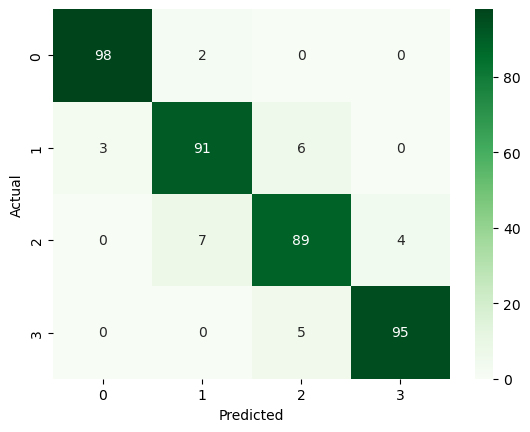

In [23]:
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Vamos a agrupar la matriz de confusión para cada clase en función de los valores que toma una matriz de confusión: TP, TN, FP, FN.

In [24]:
#Matriz de confusión por clase

classes = y_test.unique()  # Todas las clases del target

for cls in classes:
    # Convertir a binario: clase actual = positivo, resto = negativo
    y_test_bin = (y_test == cls).astype(int)
    y_pred_bin = (y_pred == cls).astype(int)
    
    # Calcular TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred_bin).ravel()
    
    print(f"Clase {cls}:")
    print(f"  True Positives (TP): {tp}")
    print(f"  True Negatives (TN): {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}\n")

Clase 3:
  True Positives (TP): 95
  True Negatives (TN): 296
  False Positives (FP): 4
  False Negatives (FN): 5

Clase 1:
  True Positives (TP): 91
  True Negatives (TN): 291
  False Positives (FP): 9
  False Negatives (FN): 9

Clase 0:
  True Positives (TP): 98
  True Negatives (TN): 297
  False Positives (FP): 3
  False Negatives (FN): 2

Clase 2:
  True Positives (TP): 89
  True Negatives (TN): 289
  False Positives (FP): 11
  False Negatives (FN): 11



**Gradient boosting**

In [25]:
# Crear y entrenar modelo Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
gb.fit(X_train, y_train)

# Predicciones
y_pred = gb.predict(X_test)

**Evaluación del modelo**

In [26]:
# Evaluar
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.92      0.92      0.92       100
           2       0.89      0.88      0.88       100
           3       0.94      0.92      0.93       100

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



Confusion Matrix:



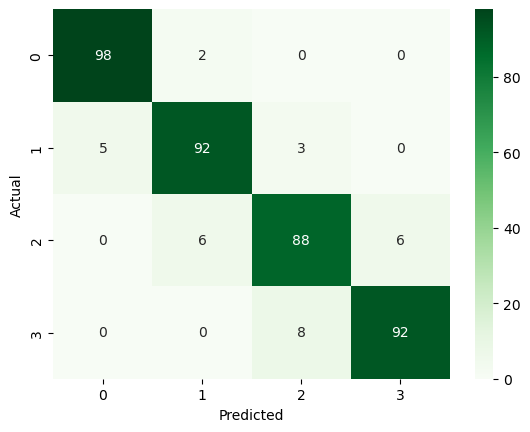

In [27]:
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
#Matriz de confusión por clase

classes = y_test.unique()  # Todas las clases del target

for cls in classes:
    # Convertir a binario: clase actual = positivo, resto = negativo
    y_test_bin = (y_test == cls).astype(int)
    y_pred_bin = (y_pred == cls).astype(int)
    
    # Calcular TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred_bin).ravel()
    
    print(f"Clase {cls}:")
    print(f"  True Positives (TP): {tp}")
    print(f"  True Negatives (TN): {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}\n")

Clase 3:
  True Positives (TP): 92
  True Negatives (TN): 294
  False Positives (FP): 6
  False Negatives (FN): 8

Clase 1:
  True Positives (TP): 92
  True Negatives (TN): 292
  False Positives (FP): 8
  False Negatives (FN): 8

Clase 0:
  True Positives (TP): 98
  True Negatives (TN): 295
  False Positives (FP): 5
  False Negatives (FN): 2

Clase 2:
  True Positives (TP): 88
  True Negatives (TN): 289
  False Positives (FP): 11
  False Negatives (FN): 12



**Elección de modelo**

Tanto Random Forest como Gradient Boosting alcanzan una accuracy global del 93%, pero al analizar las métricas por clase se observan matices importantes. El Random Forest muestra un rendimiento más equilibrado en todas las categorías, con valores de precision y recall ligeramente más altos en las clases extremas (0 y 3), lo que se refleja en f1-scores más consistentes. En cambio, el Gradient Boosting también ofrece buenos resultados, pero presenta una caída leve en la clase 3 (recall = 0.92 vs. 0.95 en Random Forest) y en la clase 2 (f1 = 0.88 frente a 0.89). Concluyendo, ambos modelos son competitivos, pero el Random Forest ofrece un mejor rendimiento general y mayor estabilidad entre las distintas clases, lo que lo convierte en la opción más fiable para este dataset.